# Basics Tutorial

This guide tries to help you start working with ModiFinder.

## Basic ModiFinder Use

You can use ModiFinder in many scenarios but the main one is when you have a known and an unknown compound (with exactly one modification site) and you want to see the likelihood of location the modification. To pass the informations, you can use USI from GNPS. First, Lets Create the Compound objects

In [8]:
from modifinder import ModiFinder, Compound
from matplotlib import pyplot as plt

c1 = "mzspec:GNPS:BERKELEY-LAB:accession:CCMSLIB00010113829"
c2 = "mzspec:GNPS:BERKELEY-LAB:accession:CCMSLIB00010125628"
helpers_array = ['mzspec:GNPS:BERKELEY-LAB:accession:CCMSLIB00010114304']
args = {
    'mz_tolerance': 0.01,
    'ppm_tolerance': 40,
    'ratio_to_base_peak': 0.01,
    'normalize_peaks': True
}
known_compound = Compound(c1, id=c1, **args)
modified_compound = Compound(c2, id=c2, **args)
helpers_compounds = [Compound(h, id=h, **args) for h in helpers_array]

Next, we can define ModiFinder object by passing the Known Compound, ModiFied analog and the helpers to that

In [13]:
mf = ModiFinder(known_compound, modified_compound, helpers=helpers_array, **args)
probs = mf.generate_probabilities()

print("predicted probabilities are: \n", probs)

predicted probabilities are: 
 [0.16592098 0.15792845 0.03942338 0.04082704 0.03942338 0.03942338
 0.03942338 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03942338 0.06012586 0.06012586 0.06012586 0.06012586
 0.06012586 0.06012586 0.07745147]


ModiFinder also comes with a lot of visualizing tools, let's visualize the alignment and the prediction

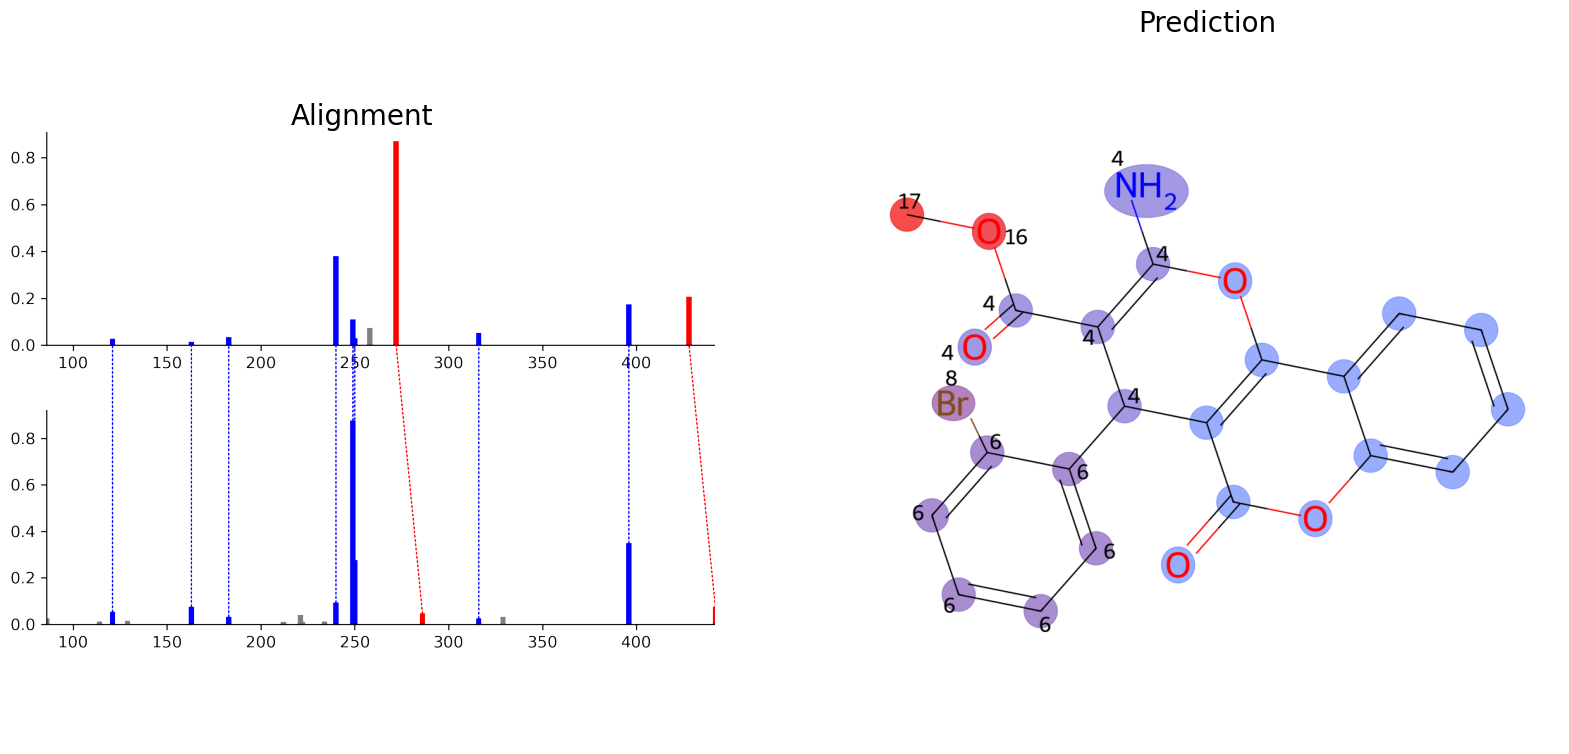

In [ ]:
img_alignment = mf.draw_alignment(known_compound.id, modified_compound.id)

img_prediction = mf.draw_prediction(probs, known_compound.id, show_legend=False, show_labels=True, shrink_labels=True, size=(1000, 1000), annotation_scale = 0.6)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img_alignment)
ax[0].set_title('Alignment', fontsize=20)
ax[1].imshow(img_prediction)
ax[1].set_title('Prediction', fontsize=20)

for a in ax:
    a.axis('off')

plt.show()

See also :ref:`modifinder.Compound`